<a href="https://colab.research.google.com/github/kwankoravich/covid19_chest_xray/blob/main/COVID_19_X_rays_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install Essential Libraries

In [1]:
!pip install fastai --upgrade

     |████████████████████████████████| 197 kB 4.1 MB/s 
     |████████████████████████████████| 60 kB 5.4 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
! pip install kaggle

In [3]:
! mkdir ~/.kaggle

In [4]:
!gdown --id 1Wq_i3cMpUTHslUP1plzL76SeK66gLLXE 

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Wq_i3cMpUTHslUP1plzL76SeK66gLLXE
To: /content/kaggle.json
100% 68.0/68.0 [00:00<00:00, 126kB/s]


In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download tawsifurrahman/covid19-radiography-database

 99% 769M/778M [00:26<00:00, 24.4MB/s]
100% 778M/778M [00:26<00:00, 31.3MB/s]


In [8]:
!unzip -qq /content/covid19-radiography-database.zip

In [9]:
!rm -rf /content/COVID-19_Radiography_Dataset/Lung_Opacity
!rm -rf /content/COVID-19_Radiography_Dataset/COVID/masks
!rm -rf /content/COVID-19_Radiography_Dataset/Normal/masks
!rm -rf '/content/COVID-19_Radiography_Dataset/Viral Pneumonia/masks'
!rm /content/COVID-19_Radiography_Dataset/COVID.metadata.xlsx
!rm /content/COVID-19_Radiography_Dataset/Lung_Opacity.metadata.xlsx
!rm /content/COVID-19_Radiography_Dataset/Normal.metadata.xlsx
!rm /content/COVID-19_Radiography_Dataset/README.md.txt
!rm '/content/COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx'

In [10]:
!mv -v /content/COVID-19_Radiography_Dataset/COVID/images/* /content/COVID-19_Radiography_Dataset/COVID
!mv -v /content/COVID-19_Radiography_Dataset/Normal/images/* /content/COVID-19_Radiography_Dataset/Normal
!mv -v '/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images/*' '/content/COVID-19_Radiography_Dataset/Viral Pneumonia'
!rm -rf /content/COVID-19_Radiography_Dataset/COVID/images
!rm -rf /content/COVID-19_Radiography_Dataset/Normal/images
!rm -rf '/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images'

Streaming output truncated to the last 5000 lines.
renamed '/content/COVID-19_Radiography_Dataset/Normal/images/Normal-5501.png' -> '/content/COVID-19_Radiography_Dataset/Normal/Normal-5501.png'
renamed '/content/COVID-19_Radiography_Dataset/Normal/images/Normal-5502.png' -> '/content/COVID-19_Radiography_Dataset/Normal/Normal-5502.png'
renamed '/content/COVID-19_Radiography_Dataset/Normal/images/Normal-5503.png' -> '/content/COVID-19_Radiography_Dataset/Normal/Normal-5503.png'
renamed '/content/COVID-19_Radiography_Dataset/Normal/images/Normal-5504.png' -> '/content/COVID-19_Radiography_Dataset/Normal/Normal-5504.png'
renamed '/content/COVID-19_Radiography_Dataset/Normal/images/Normal-5505.png' -> '/content/COVID-19_Radiography_Dataset/Normal/Normal-5505.png'
renamed '/content/COVID-19_Radiography_Dataset/Normal/images/Normal-5506.png' -> '/content/COVID-19_Radiography_Dataset/Normal/Normal-5506.png'
renamed '/content/COVID-19_Radiography_Dataset/Normal/images/Normal-5507.png' -> '/co

In [11]:
!pip install split-folders tqdm

In [12]:
import splitfolders
import fastai
from fastai.vision.all import *
from fastai.vision.data import *
from fastai.vision.augment import *

from fastai.vision import *
from torchvision.models import *    # import *=all the models from torchvision 

import cv2

import scipy.ndimage
import random
from random import randint

In [13]:
# splitfolders.ratio("/content/COVID-19_Radiography_Dataset", output="COVID_data", seed=1337, ratio=(.8, .1, .1), group_prefix=None)
splitfolders.ratio("/content/COVID-19_Radiography_Dataset", output="COVID_data", seed=1337, ratio=(.8, .2), group_prefix=None)
# splitfolders.ratio("/content/COVID-19_Radiography_Dataset/COVID", output="COVID_data_covid", seed=1337, ratio=(.8, .1, .1), group_prefix=None)

Copying files: 13808 files [00:01, 7107.84 files/s]


#Train

In [14]:
dls = ImageDataLoaders.from_folder(path = '/content/COVID_data',train='train', valid='val', item_tfms=Resize(224))

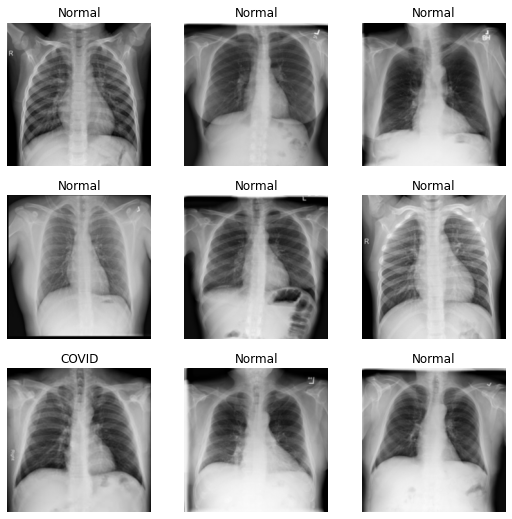

In [15]:
dls.show_batch()

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0014454397605732083)

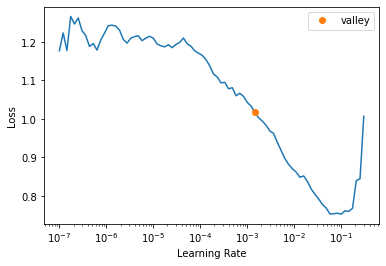

In [16]:
learn = cnn_learner(dls, 
                    resnet50, 
                    metrics=[accuracy,error_rate])
learn.lr_find()

In [ ]:
learn.fit(5, 1e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.126690,0.073894,0.980094,0.019906,00:36
1,0.046661,0.052952,0.984799,0.015201,00:36


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.126690,0.073894,0.980094,0.019906,00:36
1,0.046661,0.052952,0.984799,0.015201,00:36
2,0.030019,0.051351,0.986609,0.013391,00:36
3,0.030698,0.041111,0.988056,0.011944,00:36


In [ ]:
learn.fit_one_cycle(5, 1e-3)

In [ ]:
learn.fine_tune(5, 1e-3)

In [ ]:
learn.show_results()

#Interpret Result

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12, 12))

In [ ]:
learn.dls.valid_ds[0][1]

https://www.kaggle.com/code/daisukelab/verifying-cnn-models-with-cam-and-etc-fast-ai/notebook#Visualize-Activation-Map

In [ ]:
from fastai.callback.hook import *

def visualize_cnn_by_cam(learn, data_index):
    # x, _y = learn.data.valid_ds[data_index]
    x, _y = learn.dls.valid_ds[data_index]
    # print(_y.item())
    # x, _y = learn.validate(data_index)
    y = _y.data
    # print(y)
    if not isinstance(y, (list, np.ndarray)): # single label -> one hot encoding
        y = np.eye(learn.dls.valid_ds.c)[y]

    m = learn.model.eval()
    # xb,_ = learn.dls.one_item(x)
    xb,_ = learn.dls.one_batch()
    # xb_im = Image(learn.dls.denorm(xb)[0])
    xb = xb.cuda()

    def hooked_backward(cat):
            with hook_output(m[0]) as hook_a: 
                with hook_output(m[0], grad=True) as hook_g:
                    preds = m(xb)
                    preds[0,int(cat)].backward()
            return hook_a,hook_g
            
    def show_heatmap(img, hm, label):
            _,axs = plt.subplots(1, 2)
            axs[0].set_title(label)
            img.show(axs[0])
            axs[1].set_title(f'CAM of {label}')
            img.show(axs[1])
            axs[1].imshow(hm, alpha=0.6, extent=(0,img.shape[1],img.shape[1],0),
                          interpolation='bilinear', cmap='magma');
            plt.show()

    for y_i in np.where(y > 0)[0]:
            hook_a,hook_g = hooked_backward(cat=y_i)
            acts = hook_a.stored[0].cpu()
            grad = hook_g.stored[0][0].cpu()
            grad_chan = grad.mean(1).mean(1)
            mult = (acts*grad_chan[...,None,None]).mean(0)
            # show_heatmap(img=xb_im, hm=mult, label=str(learn.dls.valid_ds.y[data_index]))
            show_heatmap(img=xb[0], hm=mult, label = str(y_i))

for idx in range(10):
    visualize_cnn_by_cam(learn, idx)

https://www.kaggle.com/code/qitvision/a-complete-ml-pipeline-fast-ai/notebook

In [ ]:
# from fastai.callback.hook import *

# # hook into forward pass
# def hooked_backward(m, oneBatch, cat):
#     # we hook into the convolutional part = m[0] of the model
#     with hook_output(m[0]) as hook_a: 
#         with hook_output(m[0], grad=True) as hook_g:
#             preds = m(oneBatch)
#             preds[0,int(cat)].backward()
#     return hook_a,hook_g

In [ ]:
# def getHeatmap(val_index):
#     """Returns the validation set image and the activation map"""
#     # this gets the model
#     m = learn.model.eval()
#     # tensorImg,cl = imgDataBunch.valid_ds[val_index]
#     tensorImg,cl = dls.valid_ds[val_index]
#     # create a batch from the one image
#     # oneBatch,_ = imgDataBunch.one_item(tensorImg)
#     # oneBatch,_ = dls.one_item(tensorImg)
#     oneBatch,_ = dls.one_batch()
#     # oneBatch_im = Image(dls.denorm(oneBatch)[0])
#     oneBatch_im = oneBatch
#     # convert batch tensor image to grayscale image with opencv
#     # cvIm = cv2.cvtColor(image2np(oneBatch_im.data), cv2.COLOR_RGB2GRAY)
#     cvIm = oneBatch_im
#     # attach hooks
#     hook_a,hook_g = hooked_backward(m, oneBatch, cl)
#     # get convolutional activations and average from channels
#     acts = hook_a.stored[0].cpu()
#     #avg_acts = acts.mean(0)

#     # Grad-CAM
#     grad = hook_g.stored[0][0].cpu()
#     grad_chan = grad.mean(1).mean(1)
#     grad.shape,grad_chan.shape
#     mult = (acts*grad_chan[...,None,None]).mean(0)
#     return mult, cvIm

In [ ]:
# def plot_heatmap_overview(interp:ClassificationInterpretation, classes=['Negative','Tumor']):
#     # top losses will return all validation losses and indexes sorted by the largest first
#     tl_val,tl_idx = interp.top_losses()
#     #classes = interp.data.classes
#     fig, ax = plt.subplots(3,4, figsize=(16,12))
#     fig.suptitle('Grad-CAM\nPredicted / Actual / Loss / Probability',fontsize=20)
#     # Random

#     for i in range(4):
#         random_index = randint(0,len(tl_idx))
#         idx = tl_idx[random_index]
#         act, im = getHeatmap(idx)
#         H,W = im.shape
#         _,cl = interp.data.dl(DatasetType.Valid).dataset[idx]
#         cl = int(cl)
#         ax[0,i].imshow(im)
#         ax[0,i].imshow(im, cmap=plt.cm.gray)
#         ax[0,i].imshow(act, alpha=0.5, extent=(0,H,W,0),
#               interpolation='bilinear', cmap='inferno')
#         ax[0,i].set_xticks([])
#         ax[0,i].set_yticks([])
#         ax[0,i].set_title(f'{classes[interp.pred_class[idx]]} / {classes[cl]} / {interp.losses[idx]:.2f} / {interp.probs[idx][cl]:.2f}')
#     ax[0,0].set_ylabel('Random samples', fontsize=16, rotation=0, labelpad=80)
#     # Most incorrect or top losses
#     for i in range(4):
#         idx = tl_idx[i]
#         act, im = getHeatmap(idx)
#         H,W = im.shape
#         _,cl = interp.data.dl(DatasetType.Valid).dataset[idx]
#         cl = int(cl)
#         ax[1,i].imshow(im)
#         ax[1,i].imshow(im, cmap=plt.cm.gray)
#         ax[1,i].imshow(act, alpha=0.5, extent=(0,H,W,0),
#               interpolation='bilinear', cmap='inferno')
#         ax[1,i].set_xticks([])
#         ax[1,i].set_yticks([])
#         ax[1,i].set_title(f'{classes[interp.pred_class[idx]]} / {classes[cl]} / {interp.losses[idx]:.2f} / {interp.probs[idx][cl]:.2f}')
#     ax[1,0].set_ylabel('Most incorrect\nsamples', fontsize=16, rotation=0, labelpad=80)
#     # Most correct or least losses
#     for i in range(4):
#         idx = tl_idx[len(tl_idx) - i - 1]
#         act, im = getHeatmap(idx)
#         H,W = im.shape
#         _,cl = interp.data.dl(DatasetType.Valid).dataset[idx]
#         cl = int(cl)
#         ax[2,i].imshow(im)
#         ax[2,i].imshow(im, cmap=plt.cm.gray)
#         ax[2,i].imshow(act, alpha=0.5, extent=(0,H,W,0),
#               interpolation='bilinear', cmap='inferno')
#         ax[2,i].set_xticks([])
#         ax[2,i].set_yticks([])
#         ax[2,i].set_title(f'{classes[interp.pred_class[idx]]} / {classes[cl]} / {interp.losses[idx]:.2f} / {interp.probs[idx][cl]:.2f}')
#     ax[2,0].set_ylabel('Most correct\nsamples', fontsize=16, rotation=0, labelpad=80)

In [ ]:
# plot_heatmap_overview(interp, ['Negative','COVID'])